In [2]:
cd /content/drive/MyDrive/Colab Notebooks/first


/content/drive/MyDrive/Colab Notebooks/first


### import library


In [3]:
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
# loading training set features
start_time = datetime.now()
f = open("Datasets/train_set_features.pkl", "rb")
train_set_features2 = pickle.load(f)
f.close()

# reducing feature vector length 
features_STDs = np.std(a=train_set_features2, axis=0)
train_set_features = train_set_features2[:, features_STDs > 52.3]

# changing the range of data between 0 and 1
train_set_features = np.divide(train_set_features, train_set_features.max())

# loading training set labels
f = open("Datasets/train_set_labels.pkl", "rb")
train_set_labels = pickle.load(f)
f.close()

# ------------
# loading test set features
f = open("Datasets/test_set_features.pkl", "rb")
test_set_features2 = pickle.load(f)
f.close()

# reducing feature vector length 
features_STDs = np.std(a=test_set_features2, axis=0)
test_set_features = test_set_features2[:, features_STDs > 48]

# changing the range of data between 0 and 1
test_set_features = np.divide(test_set_features, test_set_features.max())

# loading test set labels
f = open("Datasets/test_set_labels.pkl", "rb")
test_set_labels = pickle.load(f)
f.close()

# ------------
# preparing our training and test sets - joining datasets and lables
train_set = []
test_set = []

for i in range(len(train_set_features)):
    label = np.array([0,0,0,0])
    label[int(train_set_labels[i])] = 1
    label = label.reshape(4,1)
    train_set.append((train_set_features[i].reshape(102,1), label))
    

for i in range(len(test_set_features)):
    label = np.array([0,0,0,0])
    label[int(test_set_labels[i])] = 1
    label = label.reshape(4,1)
    test_set.append((test_set_features[i].reshape(102,1), label))

# shuffle
random.shuffle(train_set)
random.shuffle(test_set)

# print size
print(len(train_set)) #1962
print(len(test_set)) #662


1962
662


### Part 1

In [ ]:
minimize_train_set=train_set[:200]

In [ ]:
def sigmoid(x):
    ans=1/(1+np.exp(-x))
    return ans
def result(x,w,b):
    return np.dot(w,x)+b

np.random.seed(1)
n_x=102
n_h_1=150
n_h_2=60
n_y=4
#intialize the layers here
W1 = np.random.normal(size=(n_h_1,n_x)) 
b1 = np.zeros((n_h_1,1))
W2 = np.random.normal(size=(n_h_2,n_h_1)) 
b2 = np.zeros((n_h_2,1))
W3 = np.random.normal(size=(n_y,n_h_2)) 
b3 = np.zeros((n_y,1))
counter=0
for i in range(len(minimize_train_set)):
      reshape_train=minimize_train_set[i][0]
      reshape_train_label=minimize_train_set[i][1]
      S0 = reshape_train
      S1 = sigmoid(W1 @ S0 + b1)
      S2 = sigmoid(W2 @ S1 + b2)
      S3 = sigmoid(W3 @ S2 + b3)
      index = np.where(S3 == np.amax(S3))
      max_index = np.where(reshape_train_label == np.amax(reshape_train_label))
      if index == max_index:
          counter += 1
print("Accuracy is : " +str(counter / 200))



Accuracy is : 0.23


###part 2

In [ ]:
def sigmoid(x):
    ans=1/(1+np.exp(-x))
    return ans
def result(x,w,b):
    return np.dot(w,x)+b
np.random.seed(1)
epoch=5
batch_size=10
batch_num=int(200/10)
learning_rate=0.3
np.random.seed(1)
n_x=102
n_h_1=150
n_h_2=60
n_y=4
#intialize the layers here
W1 = np.random.randn(n_h_1,n_x) 
b1 = np.zeros((n_h_1,1))
W2 = np.random.randn(n_h_2,n_h_1)
b2 = np.zeros((n_h_2,1))
W3 = np.random.randn(n_y,n_h_2) 
b3 = np.zeros((n_y,1))
costs=[]
for epoch_count in range(epoch):
  #shuffle
  total_cost=0
  print("epoch_count  "+str(epoch_count+1))
  random.shuffle(train_set)
  minimize_train_set=train_set[:200]
  for batch_count in range(batch_size):
    print("batch count "+str(batch_count+1))
    grad_W1 = np.zeros((n_h_1,n_x))
    grad_W2 = np.zeros((n_h_2,n_h_1))
    grad_W3 = np.zeros((n_y,n_h_2))
    grad_b1 = np.zeros((n_h_1,1))
    grad_b2 = np.zeros((n_h_2,1))
    grad_b3 = np.zeros((n_y,1)) 
    for i in range(batch_num):
      print("mini batch num is "+str(i+1)) 
      reshape_train=minimize_train_set[batch_count*20+i][0]
      reshape_train_lables=minimize_train_set[batch_count*20+i][1]
      S0 = reshape_train
      S1 = sigmoid(W1 @ S0 + b1)
      S2 = sigmoid(W2 @ S1 + b2)
      S3 = sigmoid(W3 @ S2 + b3)
      print(S3)
      temp_cost=0
      for s in range(len(S3)):
        temp_cost+=pow(S3[s][0]-reshape_train_lables[s][0],2)
      total_cost+=temp_cost
      for j in range(grad_W3.shape[0]):
          for k in range(grad_W3.shape[1]):
              grad_W3[j, k] += 2 * (S3[j, 0] - reshape_train_lables[j, 0]) * S3[j, 0] * (1 - S3[j, 0]) * S2[k, 0]
             # print(grad_W3)
      # bias
      for j in range(grad_b3.shape[0]):
              grad_b3[j, 0] += 2 * (S3[j, 0] - reshape_train_lables[j, 0]) * S3[j, 0] * (1 - S3[j, 0])
      
      # ---- 3rd layer
      # activation
      delta_3 = np.zeros((n_h_2, 1))
      for k in range(n_h_2):
          for j in range(n_y):
              delta_3[k, 0] += 2 * (S3[j, 0] - reshape_train_lables[j, 0]) * S3[j, 0] * (1 - S3[j, 0]) * W3[j, k]
      
      # weight
      for k in range(grad_W2.shape[0]):
          for m in range(grad_W2.shape[1]):
              grad_W2[k, m] += delta_3[k, 0] * S2[k,0] * (1 - S2[k, 0]) * S1[m, 0]
      
      # bias
      for k in range(grad_b2.shape[0]):
              grad_b2[k, 0] += delta_3[k, 0] * S2[k, 0] * (1 - S2[k, 0])
              
      # ---- 2nd layer
      # activation
      delta_2 = np.zeros((n_h_1, 1))
      for m in range(n_h_1):
          for k in range(n_h_2):
              delta_2[m, 0] += delta_3[k, 0] * S2[k][0] * (1 - S2[k, 0]) * W2[k, m]
      # weight
      for m in range(grad_W1.shape[0]):
          for v in range(grad_W1.shape[1]):
              grad_W1[m, v] += delta_2[m, 0] * S1[m,0] * (1 - S1[m, 0]) * reshape_train[v,0]
              
      # bias
      for m in range(grad_b1.shape[0]):
              grad_b1[m, 0] += delta_2[m, 0] * S1[m, 0] * (1 - S1[m, 0])
             
      W3 = W3 - (learning_rate * (grad_W3 / batch_size))
      W2 = W2 - (learning_rate * (grad_W2 / batch_size))
      W1 = W1 - (learning_rate * (grad_W1 / batch_size))
      b3 = b3 - (learning_rate * (grad_b3 / batch_size))
      b2 = b2 - (learning_rate * (grad_b2 / batch_size))
      b1 = b1 - (learning_rate * (grad_b1 / batch_size))
      
  costs.append(total_cost/200)
  print("cost of this epoch is "+str(total_cost))
  
print("average cost : "+str(sum(costs)))
epoch_list=[c+1 for c in range(epoch)]
plt.plot(epoch_list,costs)  



In [ ]:
counter=0
for i in range(len(minimize_train_set)):
      reshape_train=minimize_train_set[i][0]
      reshape_train_label=minimize_train_set[i][1]
      S0 = reshape_train
      S1 = sigmoid(W1 @ S0 + b1)
      S2 = sigmoid(W2 @ S1 + b2)
      S3 = sigmoid(W3 @ S2 + b3)
      index = np.where(S3 == np.amax(S3))
      max_index = np.where(reshape_train_label == np.amax(reshape_train_label))
      if index == max_index:
          counter += 1
print("Accuracy is : " +str(counter / 200))
       
  

Accuracy is : 0.23


##part 3


Streaming output truncated to the last 5000 lines.
 [4.58184647e-02]]
mini batch num is 17
[[4.88046552e-02]
 [3.62309631e-05]
 [4.81594121e-04]
 [3.23807617e-02]]
mini batch num is 18
[[1.12558584e-01]
 [5.40282859e-06]
 [4.82816035e-04]
 [3.39083992e-02]]
mini batch num is 19
[[6.15912318e-02]
 [7.61980659e-06]
 [1.45694476e-04]
 [1.01617597e-01]]
mini batch num is 20
[[3.48852453e-02]
 [2.66929307e-06]
 [5.95154474e-04]
 [6.30409626e-02]]
batch count 2
mini batch num is 1
[[7.59489445e-02]
 [8.37725467e-07]
 [1.15606230e-04]
 [1.95105535e-01]]
mini batch num is 2
[[7.10074023e-02]
 [8.79184879e-07]
 [1.07287507e-04]
 [2.01697490e-01]]
mini batch num is 3
[[2.50253942e-02]
 [6.67369460e-07]
 [1.55187934e-04]
 [1.18393047e-01]]
mini batch num is 4
[[8.03378925e-02]
 [8.55562792e-07]
 [1.24813265e-04]
 [2.95886163e-01]]
mini batch num is 5
[[5.51295527e-02]
 [1.17671356e-06]
 [1.39376102e-04]
 [2.75120141e-01]]
mini batch num is 6
[[2.43699858e-02]
 [7.72518717e-07]
 [1.48176208e-04]
 

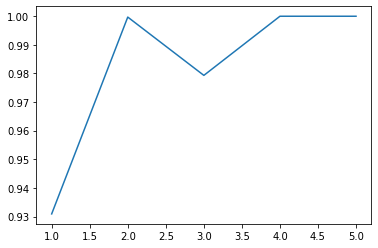

In [6]:
def sigmoid(x):
    ans=1/(1+np.exp(-x))
    return ans
def result(x,w,b):
    return np.dot(w,x)+b
np.random.seed(1)
epoch=5
batch_size=10
batch_num=int(200/10)
learning_rate=0.3
np.random.seed(1)
n_x=102
n_h_1=150
n_h_2=60
n_y=4
#intialize the layers here
W1 = np.random.randn(n_h_1,n_x) 
b1 = np.zeros((n_h_1,1))
W2 = np.random.randn(n_h_2,n_h_1)
b2 = np.zeros((n_h_2,1))
W3 = np.random.randn(n_y,n_h_2) 
b3 = np.zeros((n_y,1))
costs=[]
for epoch_count in range(epoch):
  #shuffle
  total_cost=0
  print("epoch_count  "+str(epoch_count+1))
  random.shuffle(train_set)
  minimize_train_set=train_set[:200]
  for batch_count in range(batch_size):
    print("batch count "+str(batch_count+1))
    grad_W1 = np.zeros((n_h_1,n_x))
    grad_W2 = np.zeros((n_h_2,n_h_1))
    grad_W3 = np.zeros((n_y,n_h_2))
    grad_b1 = np.zeros((n_h_1,1))
    grad_b2 = np.zeros((n_h_2,1))
    grad_b3 = np.zeros((n_y,1)) 
    for i in range(batch_num):
      print("mini batch num is "+str(i+1)) 
      reshape_train=minimize_train_set[batch_count*20+i][0]
      reshape_train_lables=minimize_train_set[batch_count*20+i][1]
      S0 = reshape_train
      S1 = sigmoid(W1 @ S0 + b1)
      S2 = sigmoid(W2 @ S1 + b2)
      S3 = sigmoid(W3 @ S2 + b3)
      temp_cost=0
      for s in range(len(S3)):
        temp_cost+=pow(S3[s][0]-reshape_train_lables[s][0],2)
      total_cost+=temp_cost
      
      grad_W3 += (2 * (S3 - reshape_train_lables) * S3 * (1 - S3)) @ np.transpose(S2)
      
      # bias
      grad_b3 += 2 * (S3 - reshape_train_lables) * S3 * (1 - S3)
      
      # ---- 3rd layer
      # activation
      delta_3 = np.zeros((n_h_2, 1))
      delta_3 += np.transpose(W3) @ (2 *(S3 - reshape_train_lables) * (S3 * (1 - S3)))
      
      # weight
      grad_W2 += (S2 * (1 - S2) * delta_3) @ np.transpose(S1)
      
      # bias
      grad_b2 += delta_3 * S2 * (1 - S2)
              
      # ---- 2nd layer
      # activation
      delta_2 = np.zeros((n_h_1, 1))
      delta_2 += np.transpose(W2) @ (delta_3 * S2 * (1 - S2))
      
      # weight
      grad_W1 += (delta_2 * S1 * (1 - S1)) @ np.transpose(reshape_train)
              
      # bias
      grad_b1 += delta_2 * S1 * (1 - S1)
       
      W3 = W3 - (learning_rate * (grad_W3 / batch_size))
      W2 = W2 - (learning_rate * (grad_W2 / batch_size))
      W1 = W1 - (learning_rate * (grad_W1 / batch_size))
      b3 = b3 - (learning_rate * (grad_b3 / batch_size))
      b2 = b2 - (learning_rate * (grad_b2 / batch_size))
      b1 = b1 - (learning_rate * (grad_b1 / batch_size))
      
  costs.append(total_cost/200)
  print("cost of this epoch is "+str(total_cost))
  print(S3)
print("average cost : "+str(sum(costs)))
epoch_list=[c+1 for c in range(epoch)]
plt.plot(epoch_list,costs)  
out=[]


In [7]:
counter=0
for i in range(len(minimize_train_set)):
      reshape_train=minimize_train_set[i][0]
      reshape_train_label=minimize_train_set[i][1]
      S0 = reshape_train
      S1 = sigmoid(W1 @ S0 + b1)
      S2 = sigmoid(W2 @ S1 + b2)
      S3 = sigmoid(W3 @ S2 + b3)
      index = np.where(S3 == np.amax(S3))
      max_index = np.where(reshape_train_label == np.amax(reshape_train_label))
      if index == max_index:
          counter += 1
print("Accuracy is : " +str(counter / 200))
       
  

Accuracy is : 0.245


##last part


cost of this epoch is 1358.5282192118832
cost of this epoch is 695.4208415266867
cost of this epoch is 589.1758777088614
cost of this epoch is 546.7847899247337
cost of this epoch is 524.5923548357727
cost of this epoch is 515.8716306487383
cost of this epoch is 509.8419784571383
cost of this epoch is 506.0552062353446
cost of this epoch is 504.6607732968567
cost of this epoch is 501.98725144971445
average cost epochs : 3.1870127030049593
average cost all of epoch : 0.14862369182924673


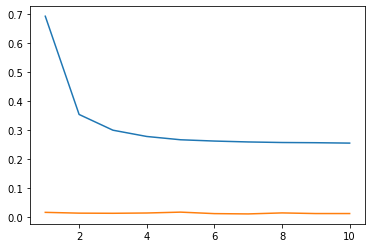

Accuracy is : 0.7502548419979612
Accuracy is for real values  : 0.7492447129909365
cost of this time  181.3499974570246
average cost : 0.27394259434595863
Duration: 0:00:19.008025


In [5]:
minimize_train_set = train_set[:1962]


def sigmoid(x):
    ans = 1 / (1 + np.exp(-x))
    return ans


np.random.seed(1)
epoch = 10
batch_size = 10
batch_num = int(1962 / 10)
learning_rate = 0.001
np.random.seed(1)
n_x = 102
n_h_1 = 150
n_h_2 = 60
n_y = 4
# intialize the layers here
W1 = np.random.randn(n_h_1, n_x)
b1 = np.zeros((n_h_1, 1))
W2 = np.random.randn(n_h_2, n_h_1)
b2 = np.zeros((n_h_2, 1))
W3 = np.random.randn(n_y, n_h_2)
b3 = np.zeros((n_y, 1))
costs1 = []
costs2 = []
for epoch_count in range(epoch):
    # shuffle
    total_cost = 0
    # print("epoch_count  " + str(epoch_count + 1))
    random.shuffle(train_set)
    minimize_train_set = train_set[:1962]
    for batch_count in range(batch_size):
        # print("batch count " + str(batch_count + 1))
        grad_W1 = np.zeros((n_h_1, n_x))
        grad_W2 = np.zeros((n_h_2, n_h_1))
        grad_W3 = np.zeros((n_y, n_h_2))
        grad_b1 = np.zeros((n_h_1, 1))
        grad_b2 = np.zeros((n_h_2, 1))
        grad_b3 = np.zeros((n_y, 1))
        for i in range(batch_num):
            # print("mini batch num is " + str(i + 1))
            reshape_train = minimize_train_set[batch_count * 196 + i][0]
            reshape_train_lables = minimize_train_set[batch_count * 196 + i][1]
            S1 = sigmoid(W1 @ reshape_train + b1)
            S2 = sigmoid(W2 @ S1 + b2)
            S3 = sigmoid(W3 @ S2 + b3)
            temp_cost = 0
            for s in range(len(S3)):
                temp_cost += pow(S3[s][0] - reshape_train_lables[s][0], 2)
            total_cost += temp_cost

            grad_W3 += (2 * (S3 - reshape_train_lables) * S3 * (1 - S3)) @ np.transpose(S2)

            # bias
            grad_b3 += 2 * (S3 - reshape_train_lables) * S3 * (1 - S3)

            # ---- 3rd layer
            # activation
            delta_3 = np.zeros((n_h_2, 1))
            delta_3 += np.transpose(W3) @ (2 * (S3 - reshape_train_lables) * (S3 * (1 - S3)))

            # weight
            grad_W2 += (S2 * (1 - S2) * delta_3) @ np.transpose(S1)

            # bias
            grad_b2 += delta_3 * S2 * (1 - S2)

            # ---- 2nd layer
            # activation
            delta_2 = np.zeros((n_h_1, 1))
            delta_2 += np.transpose(W2) @ (delta_3 * S2 * (1 - S2))

            # weight
            grad_W1 += (delta_2 * S1 * (1 - S1)) @ np.transpose(reshape_train)

            # bias
            grad_b1 += delta_2 * S1 * (1 - S1)

            W3 = W3 - (learning_rate * (grad_W3 / batch_size))
            W2 = W2 - (learning_rate * (grad_W2 / batch_size))
            W1 = W1 - (learning_rate * (grad_W1 / batch_size))
            b3 = b3 - (learning_rate * (grad_b3 / batch_size))
            b2 = b2 - (learning_rate * (grad_b2 / batch_size))
            b1 = b1 - (learning_rate * (grad_b1 / batch_size))
    cost = 0
    for train_data in train_set[:100]:
        S0 = train_data[0]
        S1 = sigmoid(W1 @ S0 + b1)
        S2 = sigmoid(W2 @ S1 + b2)
        S3 = sigmoid(W3 @ S2 + b3)
        for j in range(4):
            cost += np.power((S3[j, 0] - train_data[1][j, 0]), 2)
    costs1.append(total_cost / 1962)
    costs2.append(cost / 1962)
    print("cost of this epoch is " + str(total_cost))
print("average cost epochs : " + str(sum(costs1)))
print("average cost all of epoch : " + str(sum(costs2)))
epoch_list = [c + 1 for c in range(epoch)]

plt.plot(epoch_list, costs1)
plt.plot(epoch_list, costs2)

plt.show()
counter = 0
for i in range(len(minimize_train_set)):
    reshape_train = minimize_train_set[i][0]
    reshape_train_label = minimize_train_set[i][1]
    S0 = reshape_train
    S1 = sigmoid(W1 @ S0 + b1)
    S2 = sigmoid(W2 @ S1 + b2)
    S3 = sigmoid(W3 @ S2 + b3)
    index = np.where(S3 == np.amax(S3))
    max_index = np.where(reshape_train_label == np.amax(reshape_train_label))
    if index == max_index:
        counter += 1
print("Accuracy is : " + str(counter / 1962))

##real values
total_cost = 0
counter = 0
costs = []
for i in range(len(test_set)):
    reshape_test = test_set[i][0]
    reshape_test_label = test_set[i][1]
    S0 = reshape_test
    S1 = sigmoid(W1 @ S0 + b1)
    S2 = sigmoid(W2 @ S1 + b2)
    S3 = sigmoid(W3 @ S2 + b3)
    temp_cost = 0
    for s in range(len(S3)):
        temp_cost += pow(S3[s][0] - reshape_test_label[s][0], 2)
    total_cost += temp_cost

    index = np.where(S3 == np.amax(S3))
    max_index = np.where(reshape_test_label == np.amax(reshape_test_label))
    if index == max_index:
        counter += 1
print("Accuracy is for real values  : " + str(counter / 662))
costs.append(total_cost / 662)
print("cost of this time  " + str(total_cost))
print("average cost : " + str(sum(costs)))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
